Lab_03: Write a program to execute the following problem.
• Given an image and a mask, determine the region of the image using the mask, compute the area of the
region, then label the region by overlapping the mask over the image.

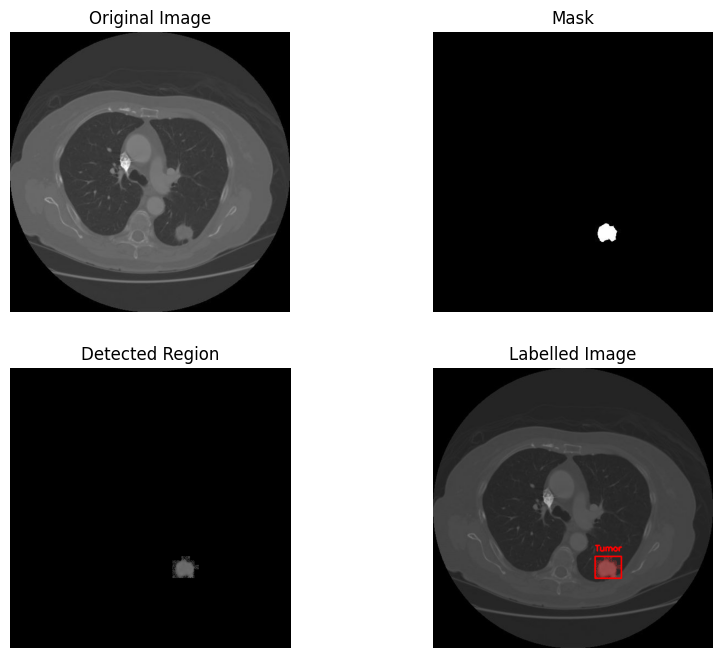

Area of the determined region: 1269


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image and mask
image_path = r"Q2MASK/image.jpg"
mask_path = r"Q2MASK/mask.jpg"
image = cv2.imread(image_path)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Check if images are loaded properly
if image is None:
    raise FileNotFoundError(f"Unable to load image from path: {image_path}")
if mask is None:
    raise FileNotFoundError(f"Unable to load mask from path: {mask_path}")

# Determine the region using the mask
region = cv2.bitwise_and(image, image, mask=mask)

# Compute the area of the determined region
area = np.sum(mask != 0)

# Create a copy of the mask with red color
red_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
red_mask[mask != 0] = [0, 0, 255]  # Set non-zero mask pixels to red color (BGR format)

# Overlay the red mask onto the original image
labelled_image = cv2.addWeighted(image, 0.7, red_mask, 0.3, 0)

# Add a rectangle outside the determined region
x, y, w, h = cv2.boundingRect(mask)  # Get bounding box coordinates
cv2.rectangle(labelled_image, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Draw rectangle

# Add label "tumor" to the rectangle
cv2.putText(labelled_image, 'Tumor', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Display the results
plt.figure(figsize=(10, 8))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Mask
plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.axis("off")

# Region
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
plt.title("Detected Region")
plt.axis("off")

# Labelled Image
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(labelled_image, cv2.COLOR_BGR2RGB))
plt.title("Labelled Image")
plt.axis("off")

plt.show()

# Output area
print("Area of the determined region:", area)
